Matplotlib обеспечивает кроссплатформенную реализацию. Совместим с большим числом ОС и обеспечивает различные форматы вывода. Интерфейс библиотечки заметно устарел, поэтому ее полезно использовать там, где не требуется сильный ux/ui, но необходима определенная надежность.

api matplotlib позволяет адаптировать вывод к таким пакетам как Seaborn, ggplot, HoloViews, Altair.

In [1]:
import matplotlib.pyplot as plt

##  Настройка стилей

plt.style

Будем использовать классический стиль, по ходу ноута оптимизируя его.

In [2]:
plt.style.use('classic')

## Три контекста построения графиков

### Построение графиков из сценария

Функция plt.show() запускает цикл ожидания события, ищет все активные на данный момент объекты графиков и открывает одно или несколько интератктивных окон для отображения.

In [3]:
import numpy as np
x = np.linspace(0, 10, 100)

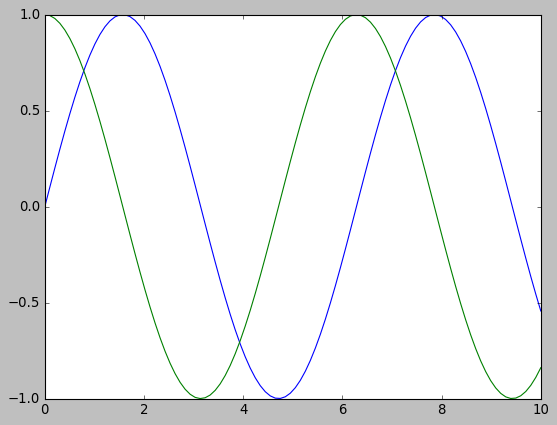

In [4]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.show()

Если такой сценарий поместить в отдельный файл, то его запуск приведет к открытию граф.оболочки системы с отображением графика.

plt.show() используется однократно в процессе выполнения сценария, чаще всего его помещают в конце ф-ла сценария. Выполнение нескольких plt.show() в одном сценарии может привести к непредсказуемому результату.

### Построение графиков из командной оболочки iPython

задается с помощью %matplotlibe После этого любой plot приводит к открытию окна графика в оболочке. При этом некоторые модификации графиков доступны только через plt.draw(). plt.show() не обязателен, однако вывод опять таки пойдет во внешний граф.интерпретатор.

In [5]:
%matplotlib
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


In [6]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

### Построение графиков из блокнота iPython

%matplotlib notebook включает динамические графики

%matplotlib inline статические

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

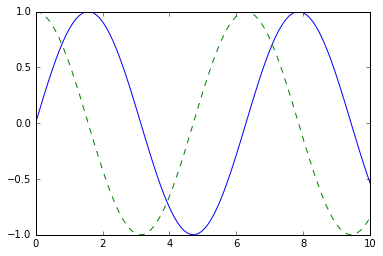

In [8]:
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')

## Сохранение в файл

In [9]:
fig.savefig('output/my_figure.png')

In [10]:
!ls -lh output/my_figure.png

-rw-rw-r-- 1 konstantin konstantin 26K Nov  6 02:37 output/my_figure.png


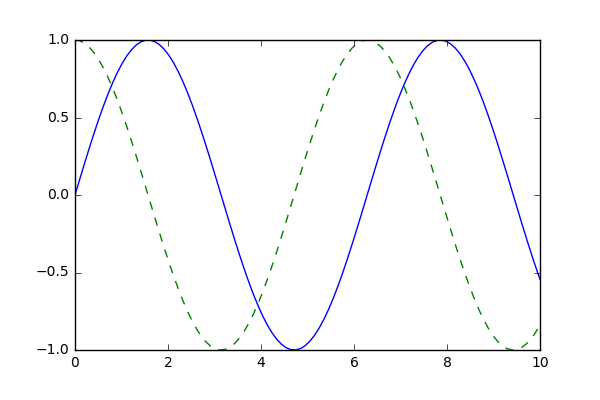

In [11]:
# можно отобразить. Это .png в данном дефолтном случае
from IPython.display import Image
Image('output/my_figure.png')

In [12]:
# список поддерживаемых форматов (специфичен к системе)
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

## Два интерфейса отображения

### MATLAB стиль

Такой интерфейс сохраняет состояние . Отслеживается текущий рисуноки оси координат для него. Для него выполняются все plt. Такой подход сложен для отображения нескольких рисунков и для перехода между ними

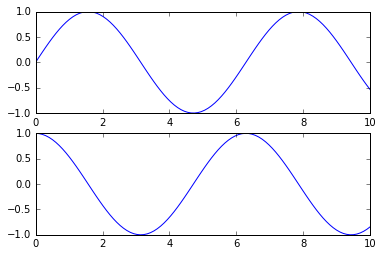

In [13]:
plt.figure()
# первая область и ее текущая ось
plt.subplot(2, 1, 1) # rows, columns, panel number
plt.plot(x, np.sin(x))
# вторая область и ее текущая ось
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))

### ООП стиль

В этом случае определяются методы явным образом определяемых объектов Figure и Axes

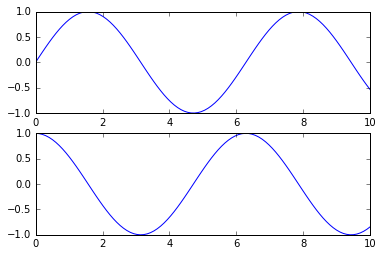

In [14]:
# Создадим сетку графиков
fig, ax = plt.subplots(2)

# вызовем метод plot() соответствующего объекта
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

## Простые линейные графики

In [15]:
plt.style.use('seaborn-whitegrid')

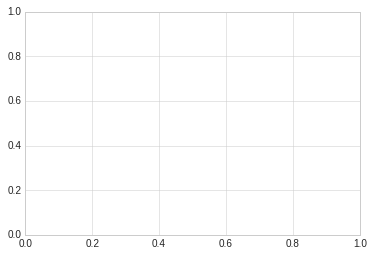

In [16]:
fig = plt.figure()
ax = plt.axes()

В данном случае figure() - единый контейнер для рисунка, содержащий все объекты, включая систему координат, графику, текст и метки. axes() - экземпляр системы координат, создающая оси

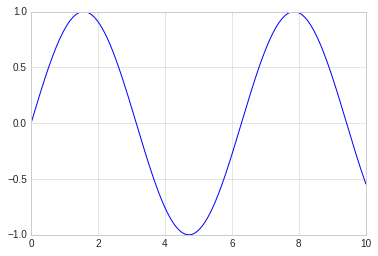

In [17]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))

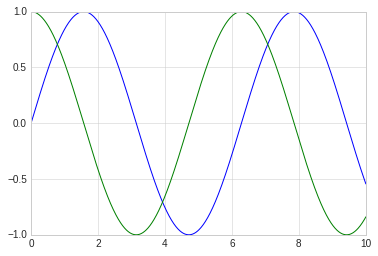

In [18]:
# можно вызвать несколько ф-й
fig = plt.figure()
ax = plt.axes()

ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))

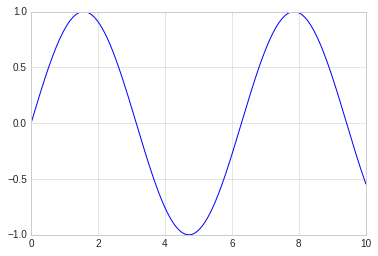

In [19]:
# в матлаб.стиле - отслеживая и изменяя единственный объект для программы
plt.plot(x, np.sin(x))

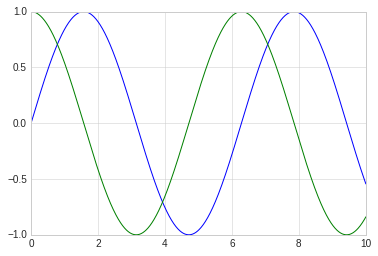

In [20]:
# можно вызвать несколько раз разные функции
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

### Цвета и линии

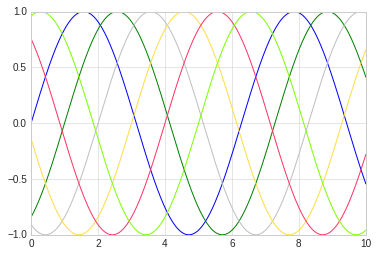

In [21]:
# цвет
fig = plt.figure()
ax = plt.axes()

ax.plot(x, np.sin(x - 0), color='blue') # по названию
ax.plot(x, np.sin(x - 1), color='g') # по краткому коду (rgbcmyc)
ax.plot(x, np.sin(x - 2), color='0.75') # по шкале оттенков серого
ax.plot(x, np.sin(x - 3), color='#FFDD44') # по шестнадцатиричному коду
ax.plot(x, np.sin(x - 4), color=(1.0, 0.2, 0.4)) # по кортежу RGB
ax.plot(x, np.sin(x - 5), color='chartreuse') # по названию из HTML-спецификации

Если цвет не задан, библиотечка задаст сама.

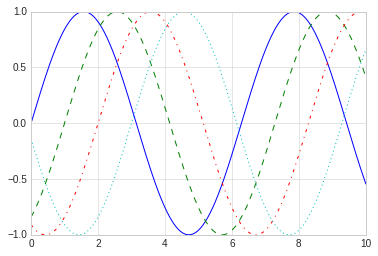

In [22]:
# стиль
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x - 0), linestyle='solid')
ax.plot(x, np.sin(x - 1), linestyle='dashed')
ax.plot(x, np.sin(x - 2), linestyle='dashdot')
ax.plot(x, np.sin(x - 3), linestyle='dotted')

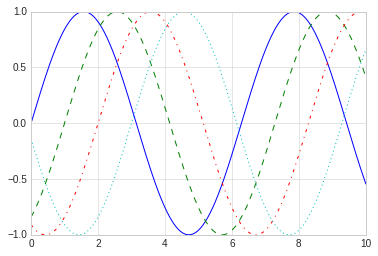

In [23]:
# или так
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x - 0), linestyle='-')
ax.plot(x, np.sin(x - 1), linestyle='--')
ax.plot(x, np.sin(x - 2), linestyle='-.')
ax.plot(x, np.sin(x - 3), linestyle=':')

Методы задания цвета и стиля можно задать, если они краткие

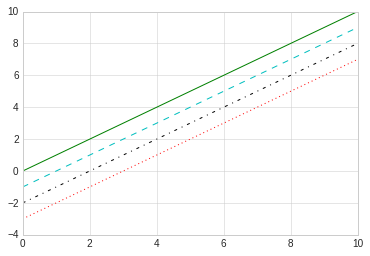

In [24]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, x - 0, '-g')
ax.plot(x, x - 1, '--c')
ax.plot(x, x - 2, '-.k')
ax.plot(x, x - 3, ':r')

### Пределы осей координат

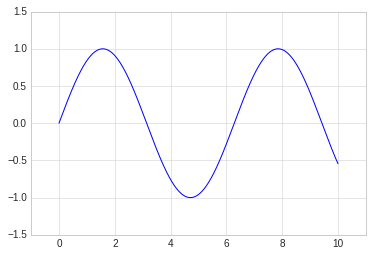

In [25]:
fig = plt.figure()
ax = plt.axes()
ax.set_xlim(-1, 11)
ax.set_ylim(-1.5, 1.5)
ax.plot(x, np.sin(x - 0))

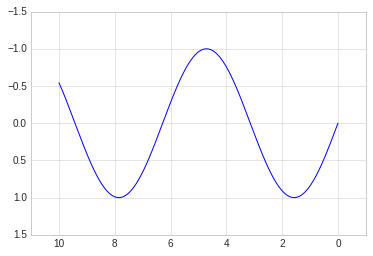

In [26]:
# зеркально
fig = plt.figure()
ax = plt.axes()
ax.set_xlim(11, -1)
ax.set_ylim(1.5, -1.5)
ax.plot(x, np.sin(x - 0))

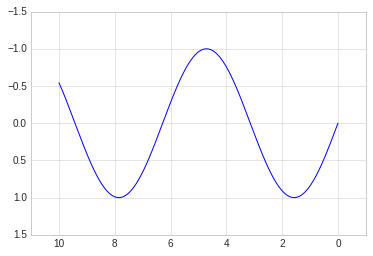

In [27]:
# одним кусом
fig = plt.figure()
ax = plt.axes()
ax.axis([11, -1, 1.5, -1.5])
ax.plot(x, np.sin(x - 0))

(0.0, 10.0, -0.9999972954811321, 0.9999996994977832)

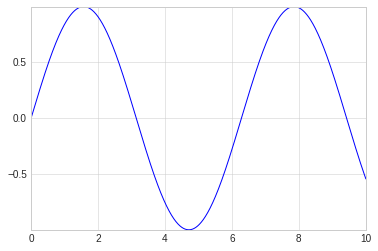

In [28]:
# автоподгонка
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x - 0))
ax.axis('tight')

(0.0, 10.0, -1.0, 1.0)

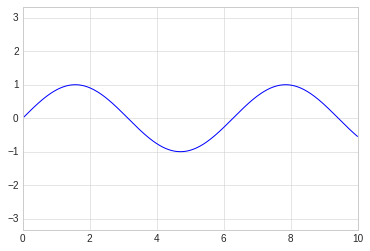

In [29]:
# подгонка под масштаб
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x - 0))
ax.axis('equal')

## Метки

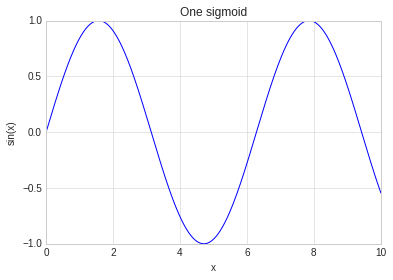

In [30]:
fig = plt.figure()
ax = plt.axes()
ax.set_title('One sigmoid')
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')
ax.plot(x, np.sin(x - 0))

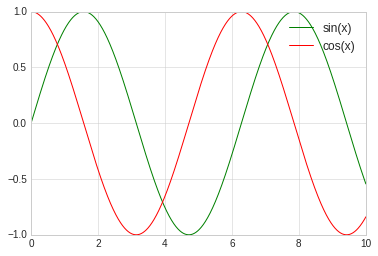

In [31]:
# легенда графика
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x), '-g', label='sin(x)')
ax.plot(x, np.cos(x), '-r', label='cos(x)')
ax.legend()

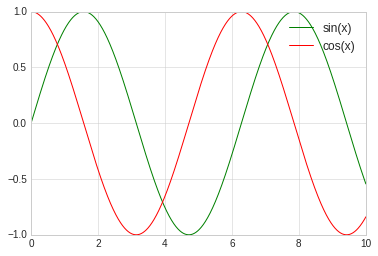

In [32]:
# естественно все тоже самое доступно через plot
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), '-r', label='cos(x)')
plt.legend()

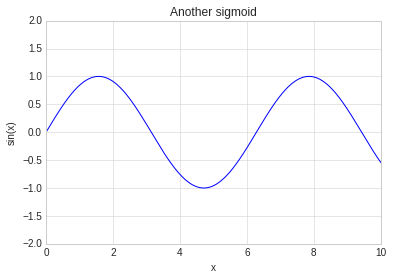

In [33]:
# кроме того, все опции доступны через ax.set()
fig = plt.figure()
ax = plt.axes()
ax.set(xlim=(0, 10), ylim=(-2, 2),
      xlabel='x', ylabel='sin(x)',
      title='Another sigmoid')
ax.plot(x, np.sin(x - 0))

## Диаграммы рассеяния

In [34]:
plt.style.use('seaborn-whitegrid')

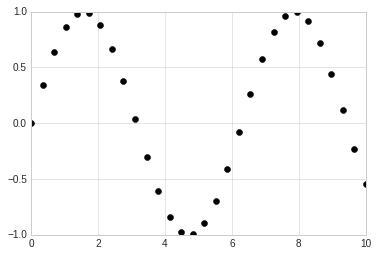

In [35]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, 'o', color = 'black')

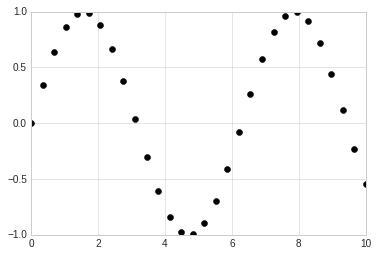

In [36]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y, 'o', color = 'black')

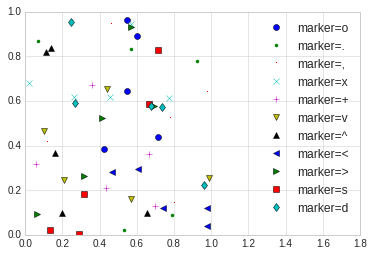

In [37]:
# все наиболее састо используемые типы символов для вывода диаграм
fig = plt.figure()
ax = plt.axes()
ax.set_xlim(0, 1.8)
rnd = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    ax.plot(rnd.rand(5), rnd.rand(5), marker, label='marker={0}'.format(marker))
ax.legend(numpoints=1)

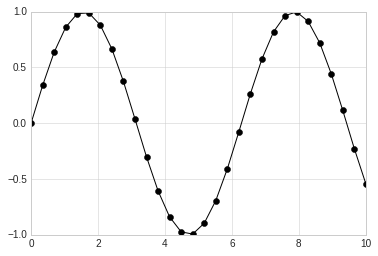

In [38]:
# млжно использовать сокращенные коды линий и цветов
# тут - линия, o код точяки, k кодц ыета
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y, '-ok')

#### plt.scattter

с помощью метода можно создавать диаграммы с индивидуально заданными свойствами каждой точки

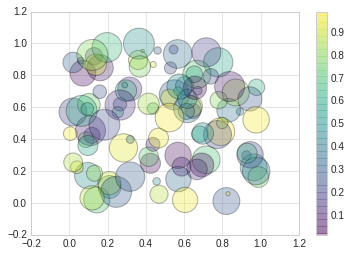

In [39]:
rnd = np.random.RandomState(0)
x = rnd.random(100)
y = rnd.random(100)
colors = rnd.rand(100)
sizes = 1000 * rnd.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar() # цветовая шкала

Text(0, 0.5, 'sepal width (cm)')

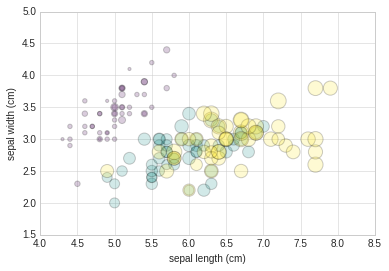

In [40]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

fig = plt.figure()
ax = plt.axes()
ax.scatter(features[0], features[1], alpha=0.2, s=100*features[3], c=iris.target, cmap='viridis')
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])

**plt.scatter значительно уступает по производительности plt.plot**

## Визуализация погрешностей

#### Простые планки погрешностей

fmt - код форматирования, управляющий внешним видом линий и точек

Кроме свечей, доступны горизонтальные линии погрешности, односторонние планки и др. См. метод errorbar

<ErrorbarContainer object of 3 artists>

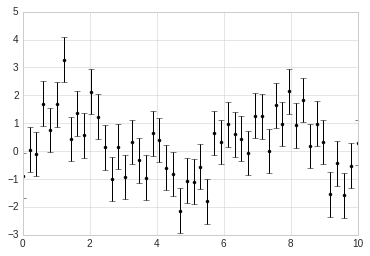

In [41]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

fig = plt.figure()
ax = plt.axes()
ax.errorbar(x, y, yerr=dy, fmt='.k')

<ErrorbarContainer object of 3 artists>

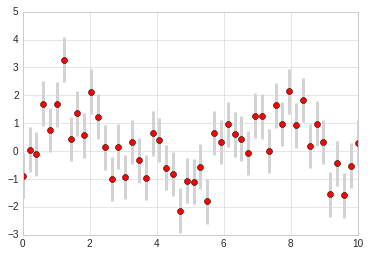

In [42]:
# еще пример

fig = plt.figure()
ax = plt.axes()
ax.errorbar(x, y, yerr=dy, fmt='o', color='r', ecolor='lightgray', elinewidth=3, capsize=0)

#### Непрерывные погрешности

Готового решения в пакете нет. Можно перейти на seaborn

In [43]:
from sklearn.gaussian_process import GaussianProcessRegressor

# model
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# подгонка гауссова процесса
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 100)
yfit, MSE = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * np.sqrt(MSE) # доверительный интервал 95%

In [44]:
print(GaussianProcessRegressor.__doc__)

Gaussian process regression (GPR).

    The implementation is based on Algorithm 2.1 of Gaussian Processes
    for Machine Learning (GPML) by Rasmussen and Williams.

    In addition to standard scikit-learn estimator API,
    GaussianProcessRegressor:

       * allows prediction without prior fitting (based on the GP prior)
       * provides an additional method sample_y(X), which evaluates samples
         drawn from the GPR (prior or posterior) at given inputs
       * exposes a method log_marginal_likelihood(theta), which can be used
         externally for other ways of selecting hyperparameters, e.g., via
         Markov chain Monte Carlo.

    Read more in the :ref:`User Guide <gaussian_process>`.

    .. versionadded:: 0.18

    Parameters
    ----------
    kernel : kernel instance, default=None
        The kernel specifying the covariance function of the GP. If None is
        passed, the kernel "1.0 * RBF(1.0)" is used as default. Note that
        the kernel's hyperparamete

In [45]:
print(gp.predict.__doc__)

Predict using the Gaussian process regression model

        We can also predict based on an unfitted model by using the GP prior.
        In addition to the mean of the predictive distribution, also its
        standard deviation (return_std=True) or covariance (return_cov=True).
        Note that at most one of the two can be requested.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features) or list of object
            Query points where the GP is evaluated.

        return_std : bool, default=False
            If True, the standard-deviation of the predictive distribution at
            the query points is returned along with the mean.

        return_cov : bool, default=False
            If True, the covariance of the joint predictive distribution at
            the query points is returned along with the mean

        Returns
        -------
        y_mean : ndarray of shape (n_samples, [n_output_dims])
            Mean of predictive distri

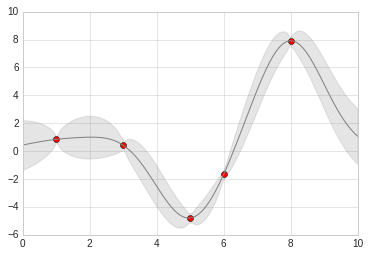

In [46]:
# визуализация
fig = plt.figure()
ax = plt.axes()
ax.set_xlim(0, 10)
ax.plot(xdata, ydata, 'or')
ax.plot(xfit, yfit, '-', color='gray')
ax.fill_between(xfit, yfit - dyfit, yfit + dyfit, color='gray', alpha=0.2)

## Графики плотности и контурные графики

- plt.contour - контурные графики
- plt.contourf  - с заполнением
- plt.imshow - отображение картинок

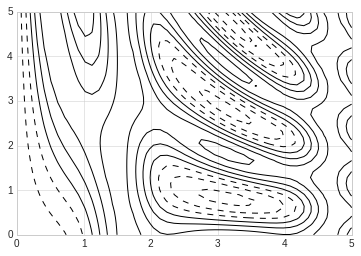

In [47]:
# визуализация трехмерной ф-ии
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y) # формирует двумерные координаты из одномерных массивов
Z = f(X, Y) # третья координатная сетка будет представлена контурами уровней

fig = plt.figure()
ax = plt.axes()
ax.contour(X, Y, Z, colors='black')

Тут атрицательные значения обозначены пунктиром (так потому что по дефолту выбран один цвет)

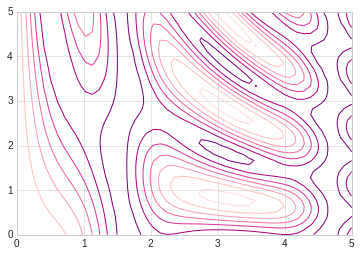

In [48]:
# другая карта цветов
fig = plt.figure()
ax = plt.axes()
ax.contour(X, Y, Z, cmap='RdPu')

# все карты цветов
# plt.cm.<TAB>

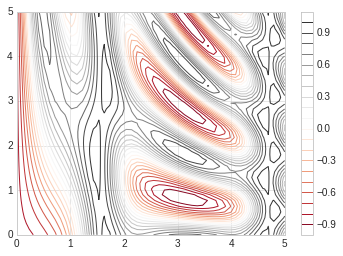

In [49]:
plt.contour(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()

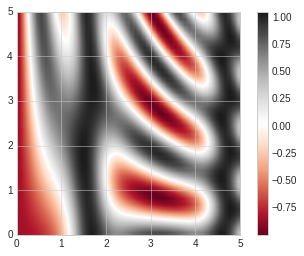

In [50]:
# лучше отрендерить это можно через plt.imshow
# В данном случае придется правда вручную задавать координаты в extend
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy')
plt.colorbar()

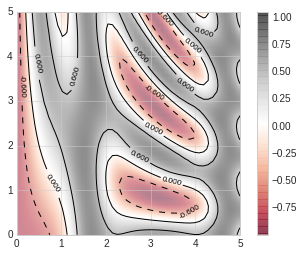

In [51]:
# можно совместить несколько отображений (задав метки на контурах)
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy', alpha=0.5)
plt.colorbar()

## Гистограммы, разбиения по интервалам и плотность

(array([10.,  8.,  8., 14.,  4.,  7., 15.,  9., 11., 14.]),
 array([0.0049604 , 0.10258021, 0.20020003, 0.29781984, 0.39543966,
        0.49305947, 0.59067929, 0.6882991 , 0.78591892, 0.88353873,
        0.98115855]),
 <a list of 10 Patch objects>)

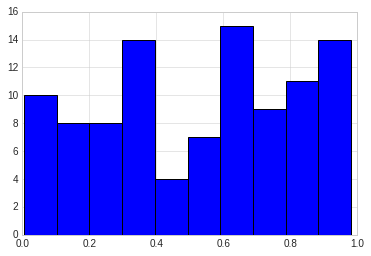

In [52]:
data = np.random.rand(100)

fig = plt.figure()
ax = plt.axes()
ax.hist(data)

(array([5., 2., 3., 3., 2., 3., 4., 1., 3., 2., 7., 5., 1., 1., 2., 2., 5.,
        0., 3., 7., 5., 1., 4., 4., 1., 7., 3., 3., 5., 6.]),
 array([0.0049604 , 0.03750034, 0.07004028, 0.10258021, 0.13512015,
        0.16766009, 0.20020003, 0.23273997, 0.26527991, 0.29781984,
        0.33035978, 0.36289972, 0.39543966, 0.4279796 , 0.46051954,
        0.49305947, 0.52559941, 0.55813935, 0.59067929, 0.62321923,
        0.65575917, 0.6882991 , 0.72083904, 0.75337898, 0.78591892,
        0.81845886, 0.8509988 , 0.88353873, 0.91607867, 0.94861861,
        0.98115855]),
 <a list of 1 Patch objects>)

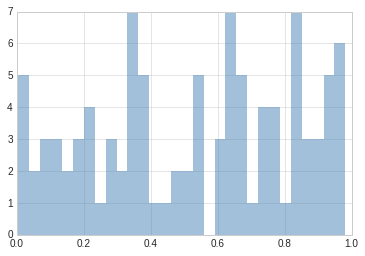

In [53]:
fig = plt.figure()
ax = plt.axes()
ax.hist(data, bins=30, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')

In [54]:
# функция histogram() из numpy считает гистограму, не отображая
counts, bin_edges = np.histogram(data, bins=5)
counts

array([18, 22, 11, 24, 25])

#### Двумерные гистограммы

In [55]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

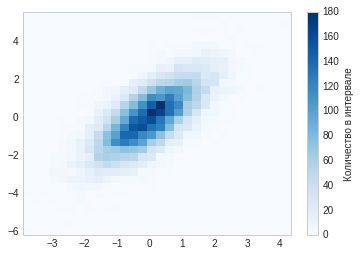

In [56]:
# plt.hist2d
plt.hist2d(x, y, bins=30, cmap='Blues')
plt.colorbar().set_label('Количество в интервале')

In [57]:
# получить данные в numpy
counts, xedges, yedges = np.histogram2d(x, y, bins=30)
counts.size

900

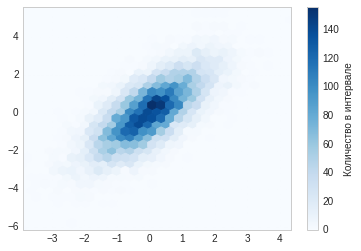

In [58]:
# plt.hexbin - через шестиугольники
plt.hexbin(x, y, gridsize=30, cmap='Blues')
plt.colorbar().set_label('Количество в интервале')

## Ядерная оценка плотности распределения (KDE)

проще делать на Seaborn

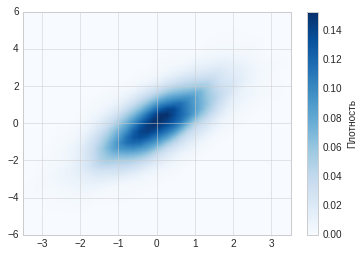

In [59]:
from scipy.stats import gaussian_kde

# подбор на массиве размера [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# вычисление на регулярной коорд.сетке
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# строим график
plt.imshow(Z.reshape(Xgrid.shape), origin='lower', aspect='auto', extent=[-3.5, 3.5, -6, 6], cmap='Blues')
plt.colorbar().set_label('Плотность')

## Пользовательские легенды

plt.legend()

In [60]:
plt.style.use('classic')

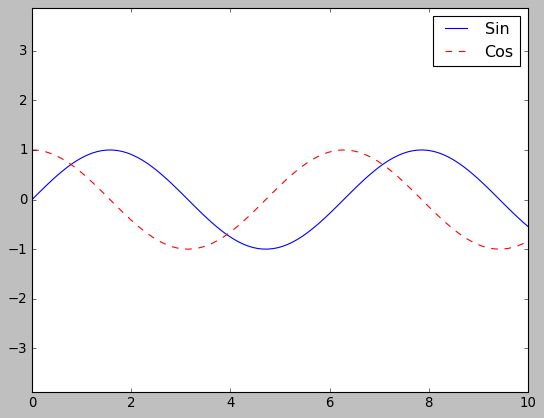

In [61]:
x = np.linspace(0, 10, 100)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sin')
ax.plot(x, np.cos(x), '--r', label='Cos')
ax.axis('equal')
ax.legend()

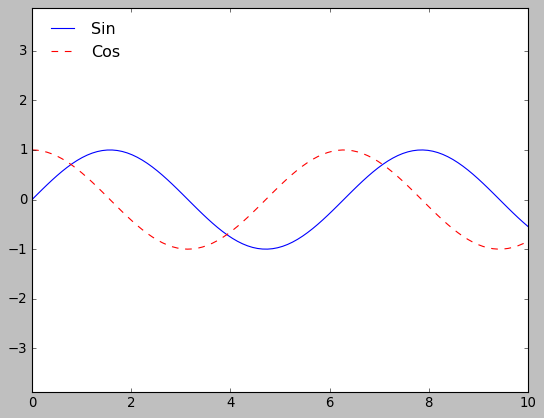

In [62]:
ax.legend(loc='upper left', frameon=False)
fig

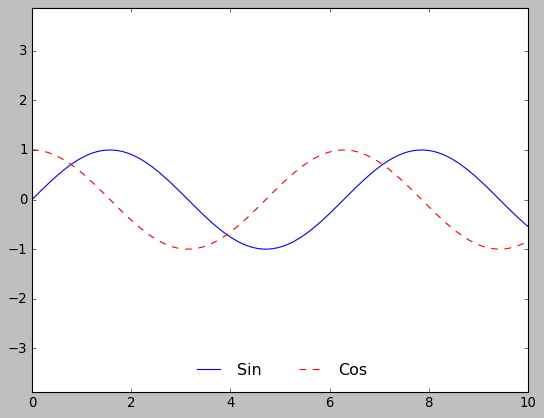

In [63]:
# число столбцов в легенде
ax.legend(loc='lower center', frameon=False, ncol=2)
fig

... и т.д. По умолчанию в легенде все маркиованные элементы. Это можно поправить, передавая в plt.legend() конкретные элементы, которые мы хотим отображать

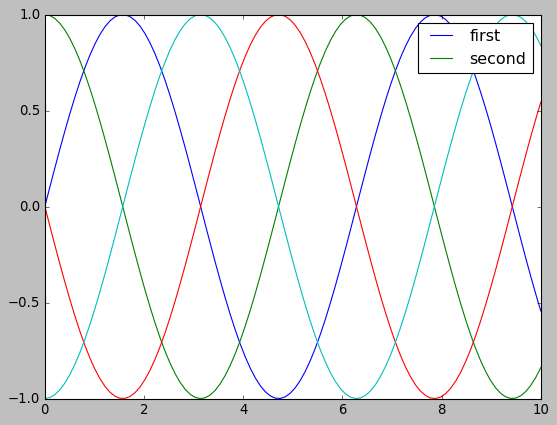

In [64]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines - это список экземпляров класса plt.line2D
plt.legend(lines[:2], ['first', 'second'])

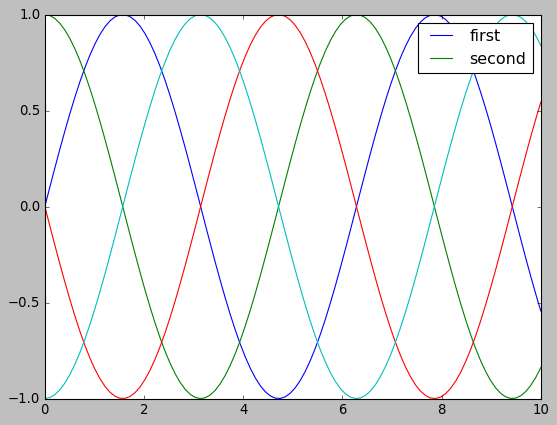

In [65]:
# другой вариант
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True)

Трюки по отрисовке нескольких легенд и легенд для точек разного размера и неотображенных на графике обхектов - см. книгу

## Пользовательские шкалы цветов

Шкала цветов (удобно для непрерывных величин) - отдельная система координат, предоставляющая клч к значению цветов на графике

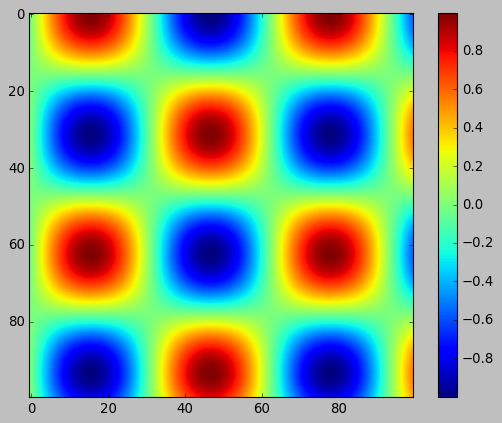

In [66]:
x = np.linspace(0, 10, 100)
I = np.sin(x) * np.cos(x[:, np.newaxis])
plt.imshow(I)
plt.colorbar()

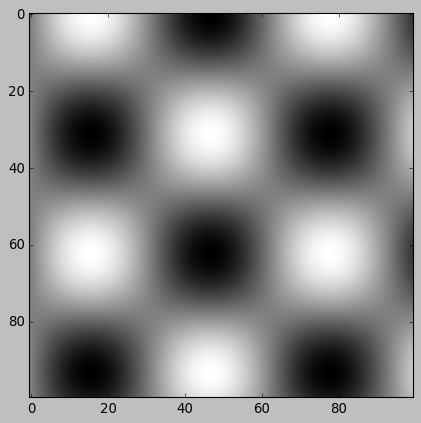

In [67]:
plt.imshow(I, cmap='gray')

[как выбирать цвета для графиков - статья](https://github.com/rougier/ten-rules)

Существуют три категории карт цветов:

- последовательные карты цветов (состоят из одной непрерывной последовательности цветов, к примеру binary или viridis или cubehelix)
- дивергентные карты цветов (содержат два хорошо различимых цвета, обозначающих положительное и отрицательное отклонение от среднего, к примеру RdBu)
- качественные карты цветов, в которых увета смешиваются без определенного порядка, например rainbow или jet. Качественные карты плохо подходят для отображения количественных данных из-за неравномерного распределения оттенков по шкале цвета (яркие полосы и ахроматическое изображение)

In [68]:
# шум 1% от пикселов
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

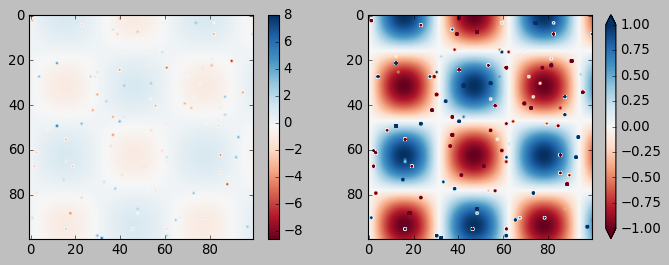

In [69]:
plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1)

#### Дискретная шкала

карты цветов по умолчанию непрерывны. Дискретность можно получить черех plt.cm.get_cmap()

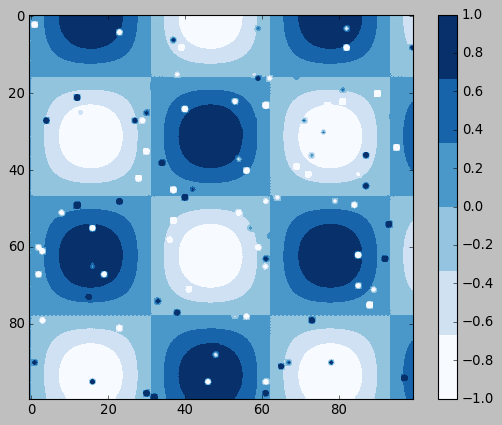

In [70]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1)

#### пример - визуализация рукописных цифр

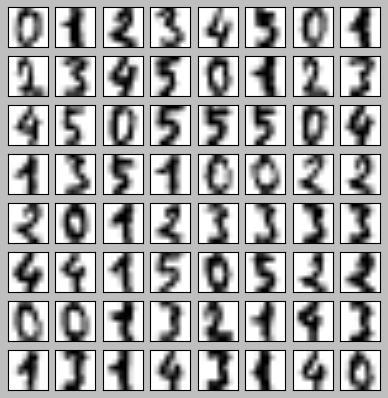

In [71]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

Каждая цифра определена 64 пикселами, т.е. ее можно представить как точку в шестнадцатимерном пространстве. Можно понизить размерность, например с помошью обучения на базе многообразий и получить представление в меньшей размерности.

In [72]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

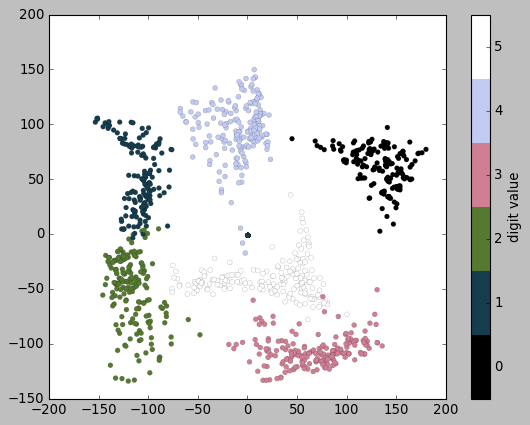

In [73]:
plt.scatter(projection[:, 0],
           projection[:, 1],
           lw=0.1,
           c=digits.target,
           cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

Тут сразу просматриваются зависимости внутри данных. Видно где множества данных пересекаются.

## Множественный субграфики

subplots - вставки, сетки графиков или другие сложные размещения

In [74]:
plt.style.use('seaborn-white')

plt.axes создание субграфиков вручнукю

Получает на вход список в системе координат графика \[нижняя координата, левая координата, ширина, высота\]. Отсчет начинается с 0 в нижнем левом углу и завершается в 1 в правом верхнем.

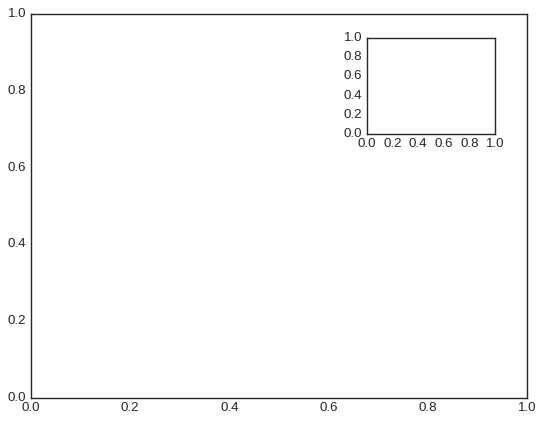

In [75]:
ax1 = plt.axes() # обычные оси координат
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

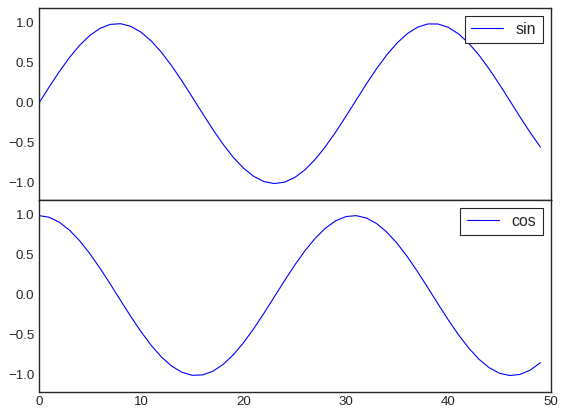

In [76]:
# аналог в ООП стиле
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim=(-1.2, 1.2))
x = np.linspace(0, 10)
ax1.plot(np.sin(x), label='sin')
ax2.plot(np.cos(x), label='cos')
ax1.legend(framealpha=1, frameon=True)
ax2.legend(framealpha=1, frameon=True)

plt.subplot - создает отдельный субграфик внутри сетки. Принимает на вход три целочисленных аргумента:

- количество строк
- количество столбцов
- индекс создаваемого графика (отсчет от верхнего левого угла, а завершение в правом нижнем)

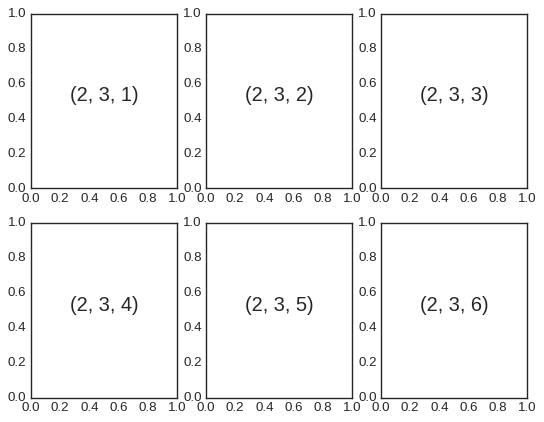

In [77]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

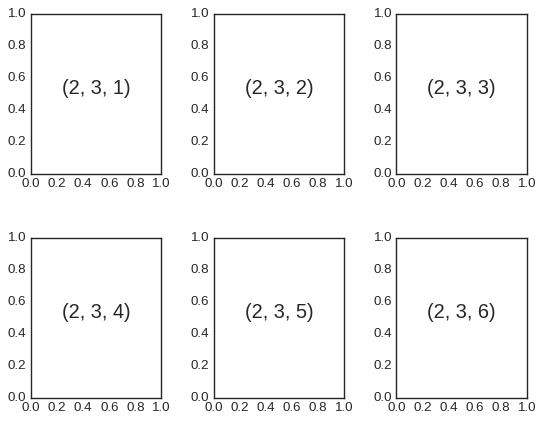

In [78]:
# настройка размера полей (в ооп стиле)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

plt.subplots() - создание всй сетки сразу. Функция создает сетку субграфиков одной строкой кода и возвращает их в нампи-массиве. аругменты - кол-во строк и столбцов, ключевые - sharex и sharey, позволяющие связывать различные системы координат.

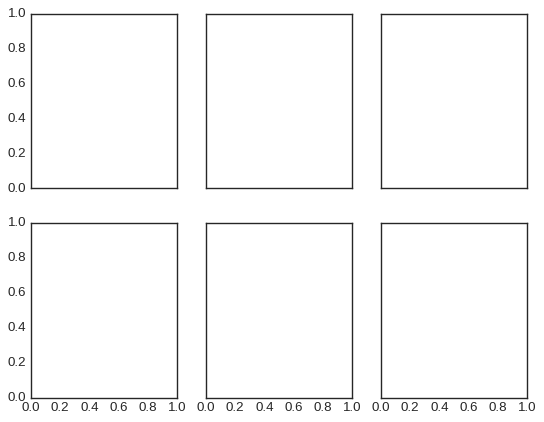

In [79]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

In [80]:
ax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e6ca0e310>,
      dtype=object)

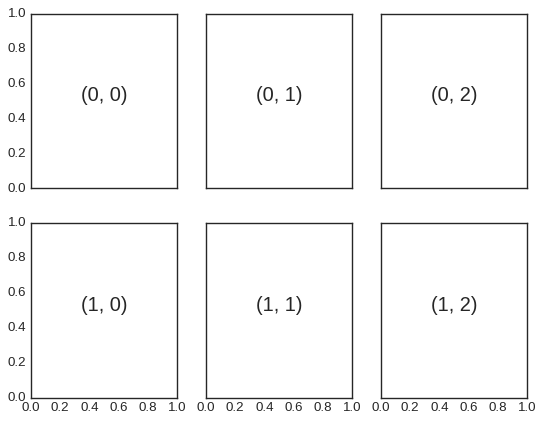

In [81]:
# возвращен массив нампай, который можно индексировать ax[строка, столбец]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')
fig

plt.GridSpec не создает графики, но это интерфей, который понятен plt.subplot(). В этом контексте легко задавать сетки

Пример для гистограмм см. в книге

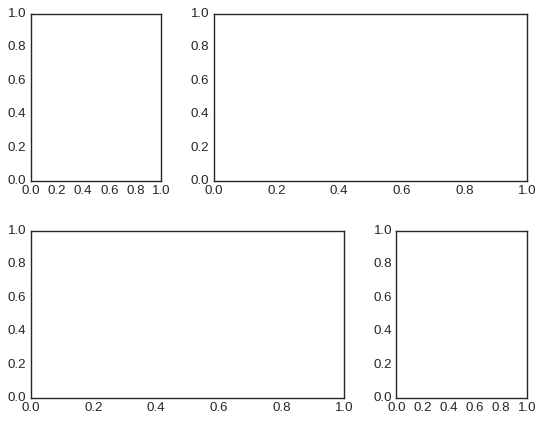

In [82]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

## Текст и поясняющие надписи

plt\.text/ax.text позволяет разметить текст непосредственно на координатах (x, y). Методы принимают на вход две координаты, строку текста и необязательные ключевые атрибуты, задающие цвет, размер, стиль, выравнивание и др. свойства текста

#### Преобразования и координаты текста

Для вывода текста в заранее заданном месте изображения, используется трансформация координат.

- ax.transData - преобразование из системы координат данных. Соответствует обычным координатам по осям X, Y
- ax.transAxes  - преобразование из системы координат объекта Axes (в единицах размеров графика).  Считает координаты от нижнего левого угла координат в виде доли от размера координатной сетки.
- ax.transFigure  - преобразование из системы координат объекта Figure (в единицах размеров графика). Считает от нижнего левого угла всего рисунка

Text(0.2, 0.2, '. Figure: (0.2, 0.2)')

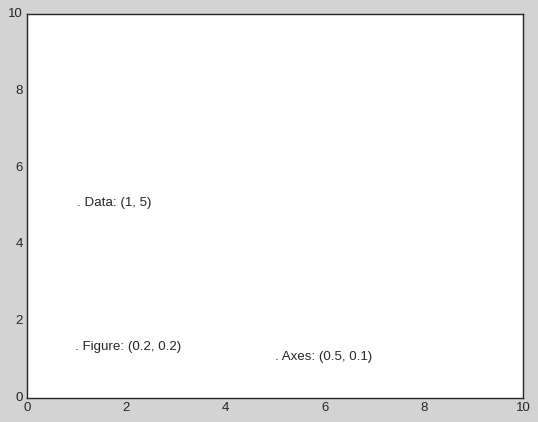

In [83]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData) # последнее необязательно - это значение по умолчанию
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure)

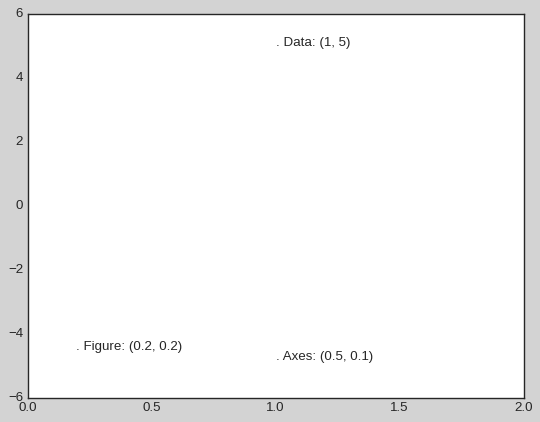

In [84]:
# смена пределов системы координат влияет только на transData
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

#### Стрелки и пояснительные записи

plt.annotate() создает текст и стрелку. plt.arrow() использовать нежелательно, т.к. создается svg объект, зависимый от соотношения сторон графика

Text(2, -6, 'local minimum')

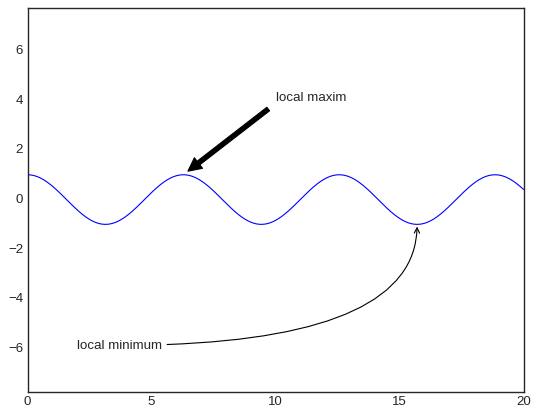

In [85]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maxim', xy=(6.28, 1), xytext=(10, 4), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('local minimum', 
            xy=(5 * np.pi, -1), 
            xytext=(2, -6), 
            arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle3,angleA=0,angleB=-90"))

## Пользовательские деления на оси координат

объект figure - ограничивающий снаружи прямоугольник. Он, как и все объекты в matplotlib - контейнер для других объектов. Любой объект figure может содержат один axes или более. Каждый axes содержит другие объекты. Метки делений не исключение. У каждого объекта axis есть атрибуты xaxis и yaxis - в этих атрибутах все свойства линий, делений и меток осей координат.

На каждой оси координат имеются основные и промежуточные метки делений. По умолчанию библиотека редко изспользует промежуточные метки

Подробности в статье

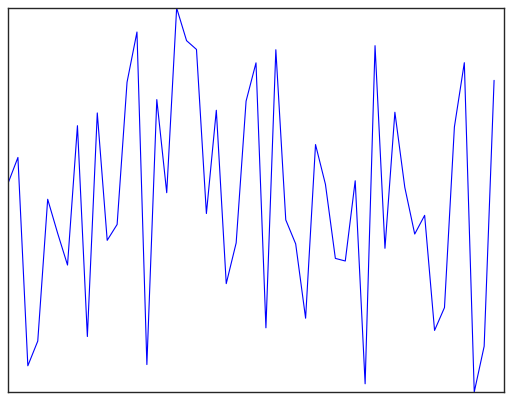

In [86]:
# прясчем деления и меток с помощью plt.NullLocator(), plt.NullFormatter()
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

В данном случае убраны метки координат, но оставлены все остальные объекты системы координат.

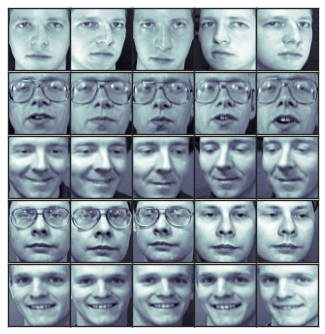

In [87]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

С помощью класса plt.MaxNLocator() можно определить максимальное отображаемое количество делений.

Более подробно по перенастройке формата делений смотри статью.

## Summary of Formatters and Locators

Locator class        | Description
---------------------|-------------
``NullLocator``      | No ticks
``FixedLocator``     | Tick locations are fixed
``IndexLocator``     | Locator for index plots (e.g., where x = range(len(y)))
``LinearLocator``    | Evenly spaced ticks from min to max
``LogLocator``       | Logarithmically ticks from min to max
``MultipleLocator``  | Ticks and range are a multiple of base
``MaxNLocator``      | Finds up to a max number of ticks at nice locations
``AutoLocator``      | (Default.) MaxNLocator with simple defaults.
``AutoMinorLocator`` | Locator for minor ticks

Formatter Class       | Description
----------------------|---------------
``NullFormatter``     | No labels on the ticks
``IndexFormatter``    | Set the strings from a list of labels
``FixedFormatter``    | Set the strings manually for the labels
``FuncFormatter``     | User-defined function sets the labels
``FormatStrFormatter``| Use a format string for each value
``ScalarFormatter``   | (Default.) Formatter for scalar values
``LogFormatter``      | Default formatter for log axes

## Пользовательские настройки

#### настройки вручную

In [88]:
plt.style.use('classic')

(array([  4.,  19.,  83., 171., 253., 246., 143.,  68.,  10.,   3.]),
 array([-3.2523121 , -2.58861566, -1.92491923, -1.2612228 , -0.59752636,
         0.06617007,  0.7298665 ,  1.39356294,  2.05725937,  2.7209558 ,
         3.38465224]),
 <a list of 10 Patch objects>)

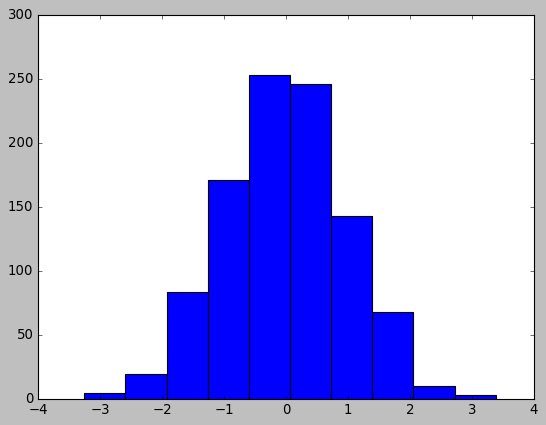

In [89]:
x = np.random.randn(1000)
plt.hist(x)

(array([  4.,  19.,  83., 171., 253., 246., 143.,  68.,  10.,   3.]),
 array([-3.2523121 , -2.58861566, -1.92491923, -1.2612228 , -0.59752636,
         0.06617007,  0.7298665 ,  1.39356294,  2.05725937,  2.7209558 ,
         3.38465224]),
 <a list of 10 Patch objects>)

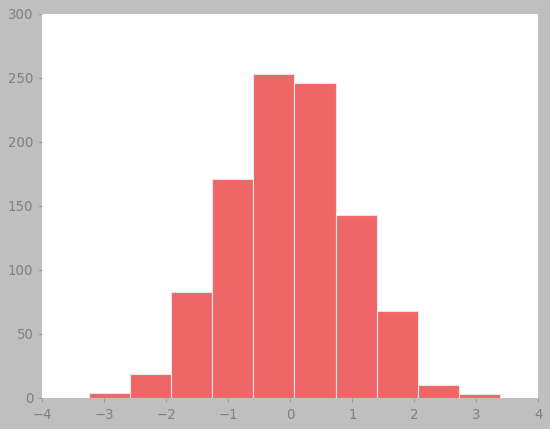

In [90]:
# настройки вручную
ax = plt.axes()
ax.set_axisbelow(True)

# белые линии на сетке
plt.grid(color='w', linestyle='solid')

# спрячем линии координат
for spine in ax.spines.values():
    spine.set_visible(False)
    
# прячем деления слева и справа
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# делаем светлее деления и метки
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# цвет заливки и границ гистограммы
ax.hist(x, edgecolor="#E6E6E6", color="#EE6666")

#### Значения по умолчанию

конфигурацию matplotlibe можно настроить с помощью утилиты plt.rc

In [91]:
# копия базовых настроек (чтобы иметь возможность бекапа)
IPython_default = plt.rcParams.copy()

In [92]:
from matplotlib import cycler

colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

(array([  4.,  19.,  83., 171., 253., 246., 143.,  68.,  10.,   3.]),
 array([-3.2523121 , -2.58861566, -1.92491923, -1.2612228 , -0.59752636,
         0.06617007,  0.7298665 ,  1.39356294,  2.05725937,  2.7209558 ,
         3.38465224]),
 <a list of 10 Patch objects>)

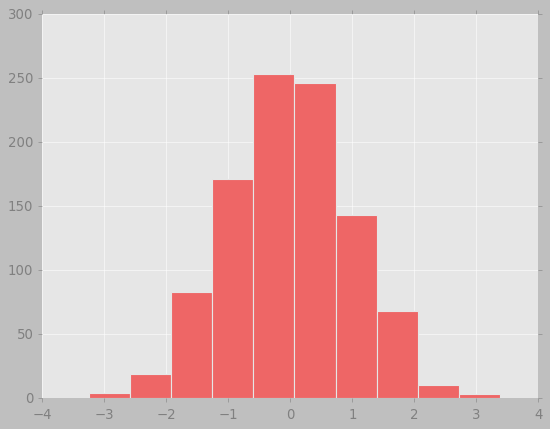

In [93]:
plt.hist(x)

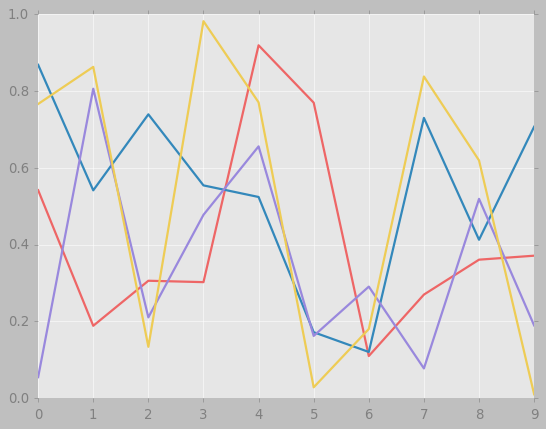

In [94]:
for i in range(4):
    plt.plot(np.random.rand(10))

#### таблицы стилей

модуль style включает таблицы стилей по умолчанию, а так-же возможность настраивать стили. Формат аналогичен файлу настроек .matplotlibrc, но расширение у них .mplstyle

In [95]:
plt.style.available[:5]

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background']

In [96]:
# восстановим стили по умолчанию
plt.rcParams.update(IPython_default)

/home/konstantin/anaconda3/envs/ml-base/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The datapath rcparam was deprecated in Matplotlib 3.2.1 and will be removed two minor releases later.
  self[key] = other[key]
/home/konstantin/anaconda3/envs/ml-base/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/konstantin/anaconda3/envs/ml-base/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/konstantin/anaconda3/envs/ml-base/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/konstantin/anaconda3/envs/ml-base/lib/python3.7/_collections_abc.py:841: MatplotlibD

In [97]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

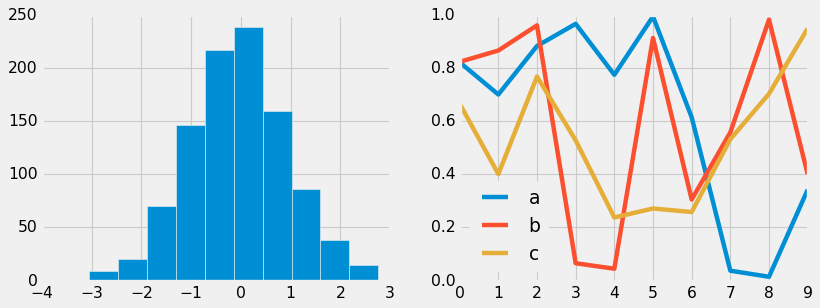

In [98]:
# можно через контекстный менеджер, что-бы не перегружать все стили
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

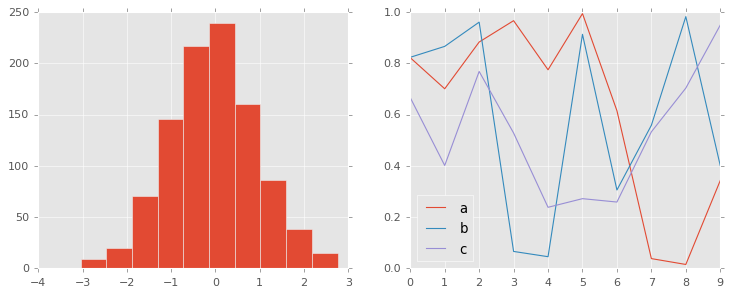

In [99]:
with plt.style.context('ggplot'):
    hist_and_lines()

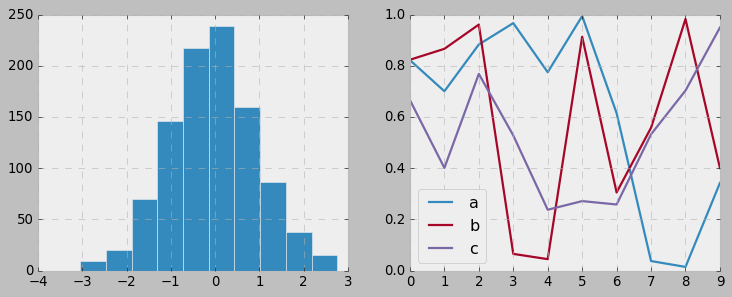

In [100]:
with plt.style.context('bmh'):
    hist_and_lines()

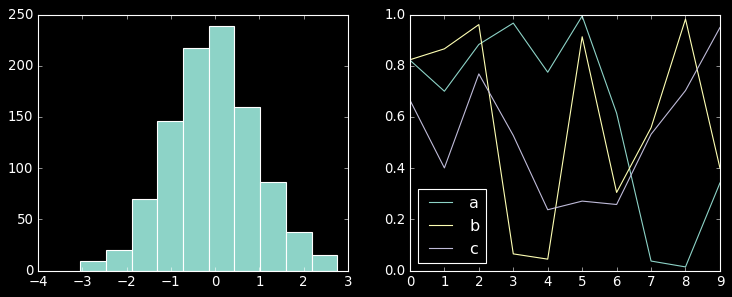

In [101]:
with plt.style.context('dark_background'):
    hist_and_lines()

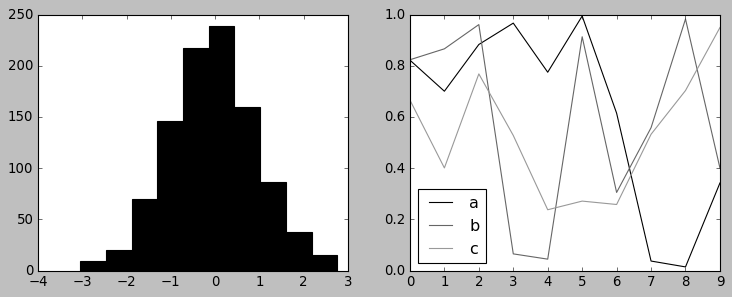

In [102]:
with plt.style.context('grayscale'):
    hist_and_lines()

## Трехмерные графики

трехмерные визуализации в matplotlibe основаны на двумерных. Это делается путем передачи атрибута projection='3d' любой двумерной функции (после импорта подмодуля mplot3d)

Трехмерные графики лучше всего просматривать в интерактивном режиме через %matplotlib notebook

In [103]:
from mpl_toolkits import mplot3d

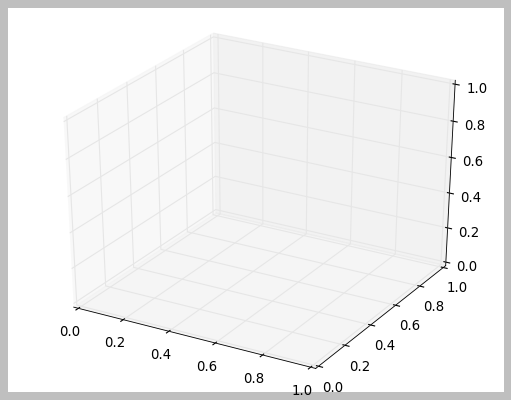

In [104]:
fig = plt.figure()
ax = plt.axes(projection='3d')

In [110]:
%matplotlib inline

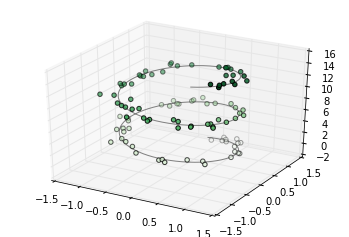

In [111]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# трехмерные линии
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# трехмерные точки
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

#### Трехмерные контурные графики

In [113]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Text(0.5, 0, 'z')

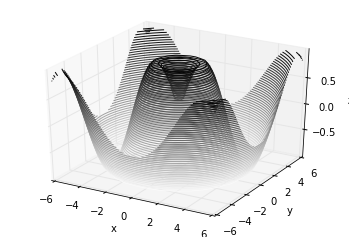

In [115]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

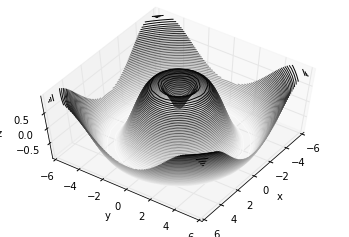

In [116]:
# view_init задает угол возвышения и азимутальный угол
ax.view_init(60, 35)
fig

#### Каркасы

выполняют проекцию координатной сети на трехмерную поверхность

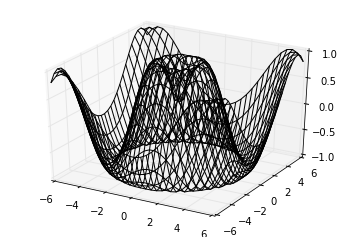

In [117]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_wireframe(X, Y, Z, color='black')

#### Поверхностный график

тоже самое, но образованные сетью грани заполнены

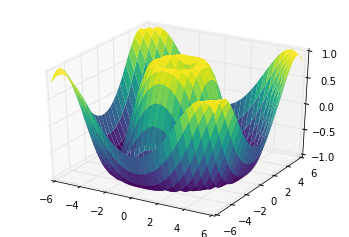

In [118]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

#### Триангуляция поверхностей

иногда удобны координатные сетки, основаныне на треугольниках

In [119]:
# набор случайно выбранных величин (вместо равномерно выбранных из предыдущего примера)
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

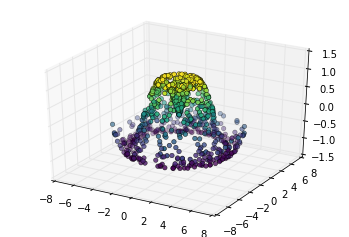

In [120]:
# результат не очень
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5)

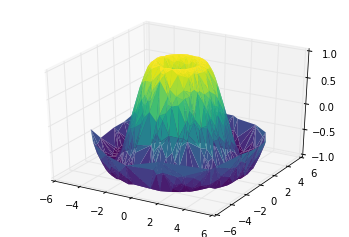

In [121]:
# отображение на основе треугольников, построененых на смежных точках
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')